In [1]:
'''data collection'''
import pandas_datareader as pdr
GOOGL_data = pdr.get_data_tiingo('FB',api_key="26938cbe034e999dd9c50c0fd99b66b7b64fa5cb")
GOOGL_data.to_csv('FB.csv')
GOOGL_data.head()

/opt/python/envs/default/lib/python3.8/site-packages/pandas_datareader/tiingo.py:234: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  return pd.concat(dfs, self._concat_axis)


close 
 high 
 low 
 open 
 volume 
 adjClose 
 adjHigh 
 adjLow 
 adjOpen 
 adjVolume 
 divCash 
 splitFactor 
 
 
 symbol 
 date 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 FB 
 2017-04-17 00:00:00+00:00 
 141.42 
 141.55 
 139.75 
 139.76 
 11519663 
 141.42 
 141.55 
 139.75 
 139.76 
 11519663 
 0.0 
 1.0 
 
 
 2017-04-18 00:00:00+00:00 
 140.96 
 141.91 
 140.61 
 141.27 
 14807472 
 140.96 
 141.91 
 140.61 
 141.27 
 14807472 
 0.0 
 1.0 
 
 
 2017-04-19 00:00:00+00:00 
 142.27 
 143.04 
 141.27 
 141.35 
 15563945 
 142.27 
 143.04 
 141.27 
 141.35 
 15563945 
 0.0 
 1.0 
 
 
 2017-04-20 00:00:00+00:00 
 143.80 
 144.25 
 142.69 
 142.95 
 15968164 
 143.80 
 144.25 
 142.69 
 142.95 
 15968164 
 0.0 
 1.0 
 
 
 2017-04-21 00:00:00+00:00 
 143.68 
 144.17 
 142.27 
 143.90 
 12382002 
 143.68 
 144.17 
 142.27 
 143.90 
 12382002 
 0.0 
 1.0

In [2]:
data2=GOOGL_data.reset_index()['close']
data2.shape
data2

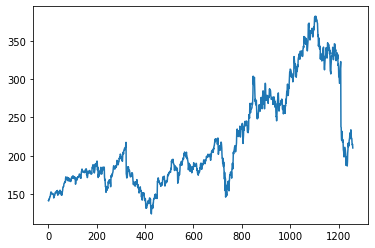

In [3]:
#plotting this frame
import matplotlib.pyplot as plt
plt.plot(data2)

In [4]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
training_set=scaler.fit_transform(np.array(data2).reshape(-1,1))
training_set.shape
print(training_set)

[[0.06725554]
 [0.06547342]
 [0.07054858]
 ...
 [0.34898497]
 [0.35227801]
 [0.33364327]]


In [5]:
#splitting the data into train and test split 
training_size=int(len(training_set)*0.65)
test_size=len(training_set)-training_size 
train_data,test_data=training_set[0:training_size,:],training_set[training_size:len(training_set),:1]
training_size,test_size

(819, 441)

In [6]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [7]:
#setting timesteps to 100 
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [8]:
print(X_train)

[[0.06725554 0.06547342 0.07054858 ... 0.18580505 0.18076863 0.18607624]
 [0.06547342 0.07054858 0.07647606 ... 0.18076863 0.18607624 0.19041531]
 [0.07054858 0.07647606 0.07601116 ... 0.18607624 0.19041531 0.18165969]
 ...
 [0.36196343 0.3506896  0.33364327 ... 0.46304045 0.46660468 0.46881296]
 [0.3506896  0.33364327 0.29699365 ... 0.46660468 0.46881296 0.44529676]
 [0.33364327 0.29699365 0.28169069 ... 0.46881296 0.44529676 0.4481249 ]]


In [9]:
print(X_train.shape,y_train.shape)

(718, 100) (718,)


In [10]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [11]:
'''creating a stacked lstm model'''
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [12]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 12s 384ms/step - loss: 0.0153 - val_loss: 0.1304
Epoch 2/100
12/12 [==============================] - 3s 267ms/step - loss: 0.0049 - val_loss: 0.0323
Epoch 3/100
12/12 [==============================] - 3s 267ms/step - loss: 0.0031 - val_loss: 0.0419
Epoch 4/100
12/12 [==============================] - 3s 284ms/step - loss: 0.0023 - val_loss: 0.0169
Epoch 5/100
12/12 [==============================] - 3s 249ms/step - loss: 0.0018 - val_loss: 0.0062
Epoch 6/100
12/12 [==============================] - 3s 238ms/step - loss: 0.0016 - val_loss: 0.0057
Epoch 7/100
12/12 [==============================] - 3s 251ms/step - loss: 0.0015 - val_loss: 0.0047
Epoch 8/100
12/12 [==============================] - 3s 239ms/step - loss: 0.0014 - val_loss: 0.0049
Epoch 9/100
12/12 [==============================] - 2s 158ms/step - loss: 0.0013 - val_loss: 0.0043
Epoch 10/100
12/12 [==============================] - 2s 154ms/step - loss: 0.0012 - val_l

In [15]:
#prediction and performance matrix
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [16]:
#Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [17]:
#RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

182.074346561352

In [18]:
#Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

309.2048259153529

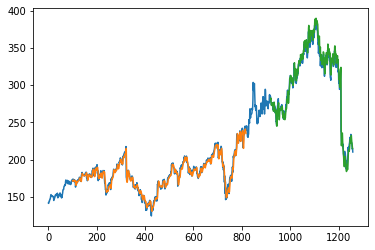

In [19]:
#Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(training_set)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(training_set)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(training_set)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(training_set))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [20]:
len(test_data)

441

In [21]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape

(1, 100)

In [22]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [23]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.3406042]
101
1 day input [0.82593367 0.84069425 0.80993336 0.82895552 0.77638308 0.72268712
 0.72187355 0.70812025 0.75085232 0.7699907  0.8000155  0.79714861
 0.79687742 0.81524097 0.81233535 0.84301875 0.81682938 0.81252906
 0.7802185  0.81411746 0.79958934 0.8181466  0.86052999 0.86068495
 0.84797768 0.853479   0.82244692 0.83093135 0.82314427 0.77525957
 0.80737641 0.80478072 0.79036882 0.81477607 0.81047575 0.7842089
 0.80520688 0.75193708 0.75751588 0.74577716 0.69390206 0.71536495
 0.68220208 0.66081667 0.66085542 0.68824578 0.73299241 0.75523013
 0.77072679 0.44049279 0.4378971  0.39070975 0.37238494 0.41817759
 0.40295212 0.36994421 0.362777   0.37556175 0.35828297 0.32407407
 0.31806912 0.30226251 0.28819929 0.32364792 0.33480552 0.33693631
 0.30772509 0.32562374 0.30571052 0.2944367  0.24566093 0.25658608
 0.288393   0.27564699 0.24620332 0.24240663 0.26332713 0.30826747
 0.32457772 0.35808926 0.33871843 0.35870913 0.34635053 0.3700217
 0.37873857 0.38559585 0.40988687 0.